# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('../datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Построим сводную таблицу показывающую зависимость вероятности (в процентах) возврата кредита от количества детей в семье
+ столбец `children` - количество детей в семье
+ столбец `debt` - вероятность возвращения кредита в срок

In [22]:
import numpy as np

df_children_debt = pd.pivot_table(data, index=['children'], values=['debt'], aggfunc=np.mean)
df_children_debt = (1 - df_children_debt['debt']) * 100

df_children_debt

children
0     92.456178
1     90.765391
2     90.545809
3     91.818182
4     90.243902
5    100.000000
Name: debt, dtype: float64

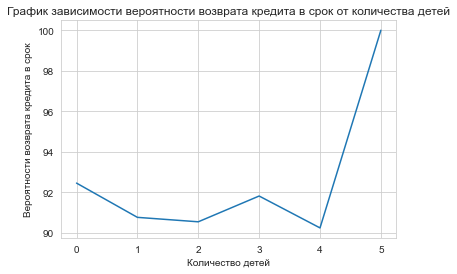

In [23]:
import matplotlib.pyplot as plt

x = df_children_debt.index
y = df_children_debt
plt.plot(x,y)
plt.xlabel('Количество детей')
plt.ylabel('Вероятности возврата кредита в срок')
plt.title("График зависимости вероятности возврата кредита в срок от количества детей")
plt.show()

**Вывод:** Как мы видим по графику, зависимости "вероятности возврата кредита" от "количества детей в семье" нету

Убедимся в однородности данных, что столбец data['debt'] содержит только нули и еденицы

In [24]:
data['debt'].value_counts()

0    19599
1     1732
Name: debt, dtype: int64

Проверим сбалансированность выборки

In [25]:
df_children_debt = pd.pivot_table(data, index=['children'], values=['debt'], aggfunc=[np.mean, len], margins=True)
df_children_debt.iloc[:, 0] = (1 - df_children_debt.iloc[:, 0]) * 100
df_children_debt

,mean,len
,debt,debt
children,,
0,92.456178,14091
1,90.765391,4808
2,90.545809,2052
3,91.818182,330
4,90.243902,41
5,100.000000,9
All,91.880362,21331


##### Отразим данные на столбчатой диаграмме

Средняя вероятность возврата каждой группы и среднее

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel="('mean', 'debt')">

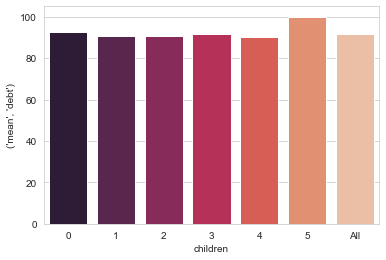

In [26]:
import seaborn as sns

sns.barplot(df_children_debt.index, df_children_debt.iloc[:, 0], palette="rocket")
None

Колличество пользователей в каждой группе

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel="('len', 'debt')">

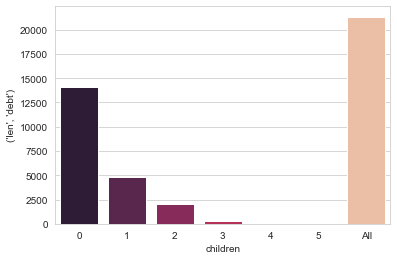

In [27]:
sns.barplot(df_children_debt.index, df_children_debt.iloc[:, 1], palette="rocket")
None

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Построим сводную таблицу показывающую зависимость вероятности (в процентах) возврата кредита от семейного положения
+ столбец `family_status` - семейный статус
+ столбец `debt` - вероятность возвращения кредита в срок

In [28]:
df_fsi_debt = pd.pivot_table(data, index=['family_status'], values=['debt'], aggfunc=np.mean)
df_fsi_debt = (1 - df_fsi_debt['debt']) * 100

df_fsi_debt

family_status
Не женат / не замужем    90.236052
в разводе                92.935240
вдовец / вдова           93.375394
гражданский брак         90.686986
женат / замужем          92.439442
Name: debt, dtype: float64

Для более корректного понимания, разобьем текущие группы на 2, имеют постоянного партнера или не имеют

In [29]:
new_data_with_family_grouped = data.copy()

new_data_with_family_grouped['partner'] = new_data_with_family_grouped['family_status_id']
new_data_with_family_grouped['partner'] = new_data_with_family_grouped['partner'].replace(
    [0, 1], 'Имеет постоянного партнера')
new_data_with_family_grouped['partner'] = new_data_with_family_grouped['partner'].replace(
    [2, 3, 4], "Не имеет постоянного партнера")

df_fsi_debt = pd.pivot_table(new_data_with_family_grouped, index=['partner'], values=['debt'], aggfunc=np.mean)
df_fsi_debt = (1 - df_fsi_debt['debt']) * 100

df_fsi_debt

partner
Имеет постоянного партнера       91.997560
Не имеет постоянного партнера    91.491086
Name: debt, dtype: float64

Разница между группами ~ 0.5%, этого не достаточно, что бы утверждать что зависимость вероятности возврата кредита от семейного положения присутствует

Так же хочу проверить гипотезу, переделить на группы:
1) Имели постоянного партнера
2) Не имели постоянного партнера

In [30]:
new_data_with_family_grouped = data.copy()

new_data_with_family_grouped['partner'] = new_data_with_family_grouped['family_status_id']
new_data_with_family_grouped['partner'] = new_data_with_family_grouped['partner'].replace(
    [2, 3], 'Имели постоянного партнера')
new_data_with_family_grouped['partner'] = new_data_with_family_grouped['partner'].replace(
    [0, 1, 4], "Не имели постоянного партнера")

df_fsi_debt = pd.pivot_table(new_data_with_family_grouped, index=['partner'], values=['debt'], aggfunc=np.mean)
df_fsi_debt = (1 - df_fsi_debt['debt']) * 100

df_fsi_debt

partner
Имели постоянного партнера       93.130841
Не имели постоянного партнера    91.740920
Name: debt, dtype: float64

Разница между вероятностями в данных группах ~1.5% , этого так же не достаточно что бы утверждать, что вероятность возврата кредита в срок зависит от семейного положения

**Вывод:** Зависимости вероятности возврата кредита в срок от семейного положения не обнаружено

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Построим сводную таблицу показывающую зависимость вероятности (в процентах) возврата кредита от семейного положения
+ столбец `total_income_category` - уровень дохода
+ столбец `debt` - вероятность возвращения кредита в срок

In [31]:
df_tic_debt = pd.pivot_table(data, index=['total_income_category'], values=['debt'], aggfunc=np.mean)
df_tic_debt = (1 - df_tic_debt['debt']) * 100

df_tic_debt

total_income_category
A    92.000000
B    92.939769
C    91.501790
D    93.982808
E    90.909091
Name: debt, dtype: float64

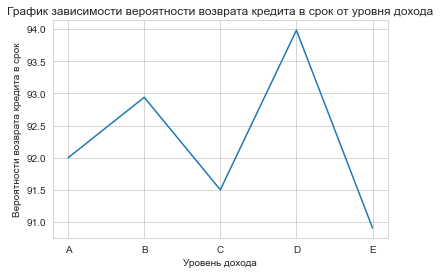

In [32]:
x = df_tic_debt.index
y = df_tic_debt
plt.plot(x,y)
plt.xlabel('Уровень дохода')
plt.ylabel('Вероятности возврата кредита в срок')
plt.title("График зависимости вероятности возврата кредита в срок от уровня дохода")
plt.show()

data['total_income_category'].unique().sort()

Из графика следует, что зависимости вероятности возврата кредита в срок от уровня дохода нет, но стоит заметить что аудитории с группой дохода "D" имеет наибольшую вероятность возврата кредита

**Вывод:** Зависимости вероятности возврата кредита в срок от уровня дохода не обнаружено

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

#### 3.4.1 Гипотеза - вероятность возврата кредита в срок зависит от категориальных целей кредита
Категориальные цели кредита - разделение на категории: автомобили, недвижимость, образование, свадьбы

In [33]:
df_pur_cat_debt = pd.pivot_table(data, index=['purpose_category'], values=['debt'], aggfunc=np.mean)
df_pur_cat_debt = (1 - df_pur_cat_debt['debt']) * 100

df_pur_cat_debt

purpose_category
операции с автомобилем      90.652022
операции с недвижимостью    92.744861
получение образования       90.747242
проведение свадьбы          92.088197
Name: debt, dtype: float64

Представим таблицу в виде столбчатой диаграммы

[Text(0, 0, 'операции с автомобилем'),
 Text(1, 0, 'операции с недвижимостью'),
 Text(2, 0, 'получение образования'),
 Text(3, 0, 'проведение свадьбы')]

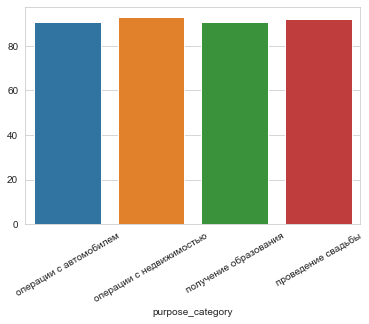

In [34]:
plot = sns.barplot(x=df_pur_cat_debt.index, y=df_pur_cat_debt.unique())
plot.set_xticklabels(plot.get_xticklabels(), rotation = 30)

Представим в виде графика в декартовой системе координат

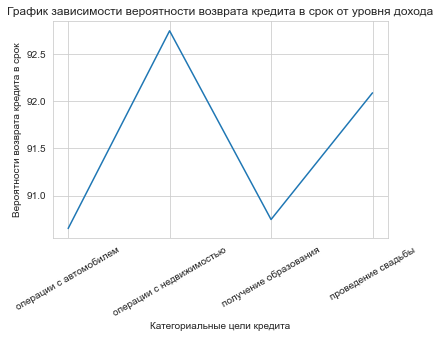

In [35]:
x = df_pur_cat_debt.index
y = df_pur_cat_debt
plt.plot(x,y)
plt.xlabel('Категориальные цели кредита')
plt.ylabel('Вероятности возврата кредита в срок')
plt.title("График зависимости вероятности возврата кредита в срок от уровня дохода")
plt.xticks(rotation = 30)
plt.show()

Категории операций с недвижимостью и свадьбами имеют вероятность возврата на ~2% больше чем категории операций с автомобилями и образованием

Проверим гипотезу, влияет ли цель получения кредита (на активы, те на бизнес или на пассивы, те не коммерческие цели) на вероятность погашения его в срок

In [36]:
data['purpose'].value_counts()

свадьба                                   790
на проведение свадьбы                     763
сыграть свадьбу                           760
операции с недвижимостью                  672
покупка коммерческой недвижимости         658
покупка жилья для сдачи                   649
операции с жильем                         647
операции с коммерческой недвижимостью     645
жилье                                     641
покупка жилья                             640
покупка жилья для семьи                   637
недвижимость                              631
строительство собственной недвижимости    628
операции со своей недвижимостью           623
строительство жилой недвижимости          620
строительство недвижимости                619
покупка своего жилья                      619
покупка недвижимости                      616
ремонт жилью                              604
покупка жилой недвижимости                602
на покупку своего автомобиля              504
заняться высшим образованием      

In [37]:
business_list = ['коммерческой', 'сдачи']
education = 'образов'

def change_purpose(row) -> str:
    for business in business_list:
        if business in row:
            return 'На бизнес'
    if education in row:
        return 'На образование'

    return 'На пассивы'

data['new_purpose_category'] = data['purpose'].apply(change_purpose)

In [38]:
df_pur_cat_debt = pd.pivot_table(data, index=['new_purpose_category'], values=['debt'], aggfunc=np.mean)
df_pur_cat_debt = (1 - df_pur_cat_debt['debt']) * 100

df_pur_cat_debt

new_purpose_category
На бизнес         92.315574
На образование    90.747242
На пассивы        92.118771
Name: debt, dtype: float64

Разделение на пассивы и активы не дало ожидаемых результатов, наоборот мы видим, что кредиты на образование уступают пассивам

**Вывод:** Разница вероятностей возврата кредита в срок между целями кредитования составила ~2%, наилучшие категории (недвижимость и свадьбы) хуже (автомобили и образование)

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Есть 2 варианта:
1) Опрашиваемые люд не указывали свой рабочий стаж и уровень заработной платы
2) Техническая ошибка при передачи данных

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* В случае если в данных есть аномалии (слишком "высокие" и "низкие" значения) заполнение средним арифмитическим может исказить данные, в таком случае идеально подойдет заполнение пропуском медианным значением, тк такой способ нивелирует выбросы (аномалии)

### Шаг 4: общий вывод.

*Предобработка данных* - важный этап для аналитика, удаление дубликатов, заполнение пропусков (медианным значением), обработка аномальных значений (модулем), все эти операции с данными влияют на конечный результат. В этом проекте передо мной стояла задача исследовать данные и найти зависимости.

##### Резюмирую:
1) Зависимости “вероятности возврата кредита в срок” от “количества детей в семье” нет. Вероятность не возрастает в след за увеличением количества детей
2) Зависимости "вероятности возврата кредита в срок" от семейного положения не обнаружено
3) Зависимости "вероятности возврата кредита" в срок" от уровня дохода не обнаружено. Вероятность не возрастает в след за увеличением дохода
4) Разница вероятностей возврата кредита в срок между целями кредитования составила ~2%, наилучшие категории (недвижимость и свадьбы) хуже (автомобили и образование)

# Общий вывод
Я провел исследование зависимости вероятности возврата кредита в срок от различных факторов, для модели кредитного скролинга - софта для аналитики банковских заёмщиков.

## Гипотезы
Влиение факторов на на вероятность погашения кредита в срок:
1. Количество детей.
2. Семейное положение.
3. Уровень дохода.
4. Семейное положение.
В процессе исследования удалось заметить следующие зависимости:

### Гипотеза 1 - *Количество детей*: 
Стоит заметить, что по некоторым группам заемщиков у нас недостаточно данных. Поэтому по категорям заемщиков с 3,4,5 детьми невозможно найти закономерность. Мы проверили гипотезу на группах с 0,1,2 детьми в семье:
Ниже будут прописаны вероятности возврата кредита в срок:
+ 92.46% - для бездетных семей
+ 90.77% - для семьи с одним ребенком
+ 90.55% - для семьи с двумя детьми

In [ ]:
plt.plot(['0', '1', '2'], [92.46, 90.77, 90.55])
plt.xlabel('Количество детей')
plt.ylabel('Вероятности возврата кредита в срок')
plt.title("График зависимости вероятности возврата кредита в срок от колличества детей")
plt.show()

Мы видим незначительный нисходящий тренд ~2%, падение вероятности с увеличением количества детей. Можем сделать вывод, что есть незначительная зависимость. 

*... если считать, что любая разница между группами есть повод для «разделения» классов ...*

### Гипотеза 2 - *Семейное положение*: 
Обобщим исследование этой гипотезы, в ходе размышлений я пришел к выводу: наибольшая разница между вероятностями возврата кредита в срок, наблюдается при следующей группировке:
+ Имели постоянного партнера       93.13%
+ Не имели постоянного партнера    91.74%

In [ ]:
plt.plot(['Имели постоянного партнера', 'Не имели постоянного партнера'], [93.13, 91.74])
plt.xlabel('Опыт в отношениях')
plt.ylabel('Вероятности возврата кредита в срок')
plt.title("График зависимости вероятности возврата кредита в срок от семейного положения")
plt.show()

Мы видим незначительный нисходящий тренд ~2.5%, падение вероятности у пар, неимеющих опыта с партнером. Можем сделать вывод, что есть незначительная зависимость. 

*... если считать, что любая разница между группами есть повод для «разделения» классов ...*

### Гипотеза 3 - *Уровень дохода*: 
В результате исследования доказано, что зависимости вероятности возврата кредита в срок от уровня дохода нет, пояснение: из роста дохода не следует рост вероятности возврата кредита в срок, однако разницы в вероятностях возврата достаточно для "разделения классов"


### Гипотеза 4 - *Влияние целей кредита*:
Разница вероятностей возврата кредита в срок между целями кредитования составила ~2%, наилучшие категории (недвижимость и свадьбы) хуже (автомобили и образование)